# Dealing with Missing Data in the dataset Facial Keypoints Detection

The dataset proposed for this competition contains a lot of missing values (only 30% of data for some features). The goal of this notebook is to do an Exploratory Data Analysis on the facial kepoints dataset.


# Libraries

In [1]:
import pandas as pd
import numpy as np
import random
import math
from PIL import Image

# Visualizations
import plotly.express as px
import matplotlib.pyplot as plt

COLORS = ['#390099', '#9e0059', '#ff0054', '#ff5400', '#ffbd00']

# missing value
import missingno as msno

from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

# Machine Learning
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')
print("No Warning Shown")

No Warning Shown


# Load data

In [2]:
def load_data():
    try:
        train_data = pd.read_csv('./training.csv')
        test_data = pd.read_csv('./test.csv')
        lookid_data = pd.read_csv('../input/facial-keypoints-detection/IdLookupTable.csv')
    except:
        print("Pas de fichiers déjà, unzip en cours")
        !unzip ../input/facial-keypoints-detection/training.zip
        !unzip ../input/facial-keypoints-detection/test.zip
        train_data = pd.read_csv('./training.csv')
        test_data = pd.read_csv('./test.csv')
        lookid_data = pd.read_csv('../input/facial-keypoints-detection/IdLookupTable.csv')

    print(train_data.shape, test_data.shape)
    
    return train_data, test_data, lookid_data

In [3]:
train_data, test_data, lookid_data = load_data()

Pas de fichiers déjà, unzip en cours
Archive:  ../input/facial-keypoints-detection/training.zip
  inflating: training.csv            
Archive:  ../input/facial-keypoints-detection/test.zip
  inflating: test.csv                
(7049, 31) (1783, 2)


# Functions

In [4]:
def plot_images(df, nb_images, shrinkage):
    """
    Function to plot images and the corresponding facial keypoints.

    INPUTS:
      * images    : numpy array with shape (m, d, d, c), dtype=float
      * points    : numpy array with shape (m,), dtype=float
      * nbColumns : number of columns in the resulting image grid
      * shrinkage : how much each image to be shrinked for display
    """
    nb_columns = 5
    nb_rows = nb_images//nb_columns
    if nb_images%nb_columns != 0:
      nb_rows += 1
   
    print("------------------")
    print(f"Number of rows: {nb_rows}, number of cols: {nb_columns}")

    height, width = (96, 96)

    image_idx = random.sample(df.index.tolist(), nb_images)

    fig_width = int(width*nb_columns*shrinkage)
    fig_height = int(height*nb_rows*shrinkage)

    fig, axes = plt.subplots(nb_rows, nb_columns, figsize=(fig_width, fig_height))

    print(f"Figure width: {fig_width}, height: {fig_height}")
    print("------------------")
    axes = axes.flatten()

    for i, value in enumerate(image_idx):
      img = df.loc[value, 'Image'].split(" ")
      img = [int(x) for x in img]
      img = np.reshape(np.array(img), (96, 96))
      
      ax = axes[i]
      ax.imshow(img, cmap="Greys_r")
      #points = df.iloc[value, 0:30].dropna().tolist()
      #pnt_x = [points[2*j] for j in range(int(len(points)/2))]
      #pnt_y = [points[2*j+1] for j in range(int(len(points)/2))]
      #ax.scatter(pnt_x,pnt_y,s=200,c='r')
      ax.set_axis_off()

    plt.tight_layout()
    plt.show()

In [5]:
def remove_mv_from_a_column(df, column_name):
  # Missing values before
  train_mv = df[column_name].isna().sum()
  missing_value = np.where(df[column_name].isna())[0]

  # Drop corresponding missing values
  df = df.drop(missing_value)
  df = df.reset_index().drop(columns='index')

  # Print number of missing values left
  print("--------- ", column_name, " ---------")
  print(column_name, ' missing values before:',train_mv)
  print(column_name, ' missing values after:',df[column_name].isna().sum())

  return df

In [6]:
def complete_linear_feature(df, to_complete, base_feature):
  train_mv = df[to_complete].isna().sum()

  df_complete = df.loc[:, [to_complete, base_feature]].dropna()
  x = np.array(df_complete[base_feature].tolist()).reshape((-1, 1))
  y = df_complete[to_complete].tolist()
  
  model = LinearRegression().fit(x, y)

  r_sq = model.score(x, y)
  print("--------- ", to_complete, "---------")
  print("Coefficient of determination: ", r_sq, '\n')

  mv_idx = np.where(df[to_complete].isna())
  df[to_complete].iloc[mv_idx] = df[base_feature].iloc[mv_idx].apply(lambda x: model.predict(np.array(x).reshape((-1, 1)))[0])

  # Print number of missing values left
  print(to_complete, ' missing values before:',train_mv)
  print(to_complete, ' missing values after:', df[to_complete].isna().sum(), '\n')
  return df

# Dealing with missing data

<AxesSubplot:>

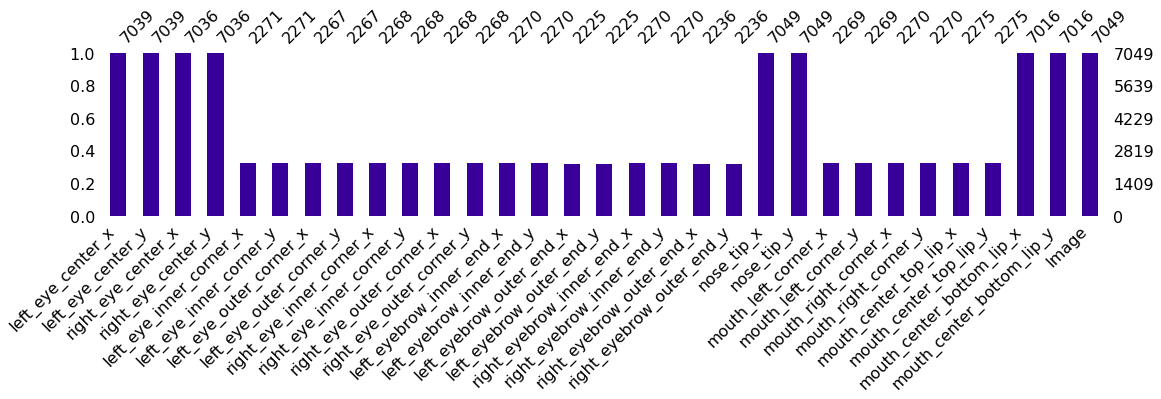

In [7]:
# Visualize missing data 
msno.bar(train_data,figsize=(18,3), color=COLORS[0])

As we said earlier a lot of features have more than 60% of missing of missing values. Let's see the exact number of missing values for each features

In [8]:
train_data.isna().sum()

left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33
mouth_center_b

## Eyes positions

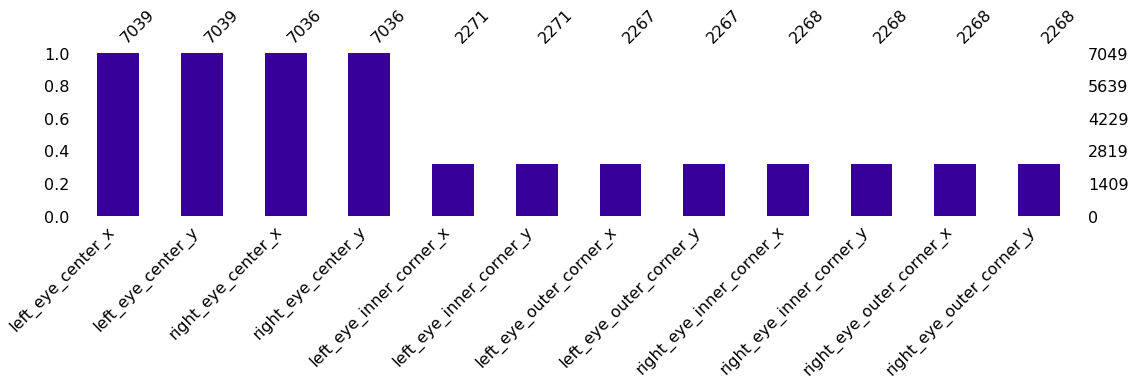

In [9]:
df_eyes = train_data.iloc[:, 0:12]

# Visualize missing data 
msno.bar(df_eyes,figsize=(18,3), color=COLORS[0])

df_eyes = df_eyes.dropna()

In [10]:
train_without_left_eye = train_data.iloc[np.where(train_data['left_eye_center_x'].isna())[0]]
plot_images(train_without_left_eye, 10, 0.4)

------------------
Number of rows: 2, number of cols: 5
Figure width: 192, height: 76
------------------


The pictures where the left eye is missing are bad wuality pictures so we decided to remove them from the dataset

**Left eye center**

In [11]:
train_data = remove_mv_from_a_column(train_data, "left_eye_center_x")

---------  left_eye_center_x  ---------
left_eye_center_x  missing values before: 10
left_eye_center_x  missing values after: 0


**Right eye center**

In [12]:
train_data = remove_mv_from_a_column(train_data, "right_eye_center_x")

---------  right_eye_center_x  ---------
right_eye_center_x  missing values before: 6
right_eye_center_x  missing values after: 0


In [13]:
corr_matrix = df_eyes.corr()
fig = px.imshow(corr_matrix, text_auto=True, aspect="auto", color_continuous_scale=COLORS)
fig.show()

In [14]:
fig = px.scatter(df_eyes, x="left_eye_outer_corner_y", y="left_eye_center_y", trendline="ols", color_discrete_sequence=COLORS, trendline_color_override=COLORS[2], title='Left eye corner and center y correlation')
fig.show()

In [15]:
fig = px.scatter(df_eyes, x="left_eye_outer_corner_x", y="left_eye_center_x", trendline="ols", color_discrete_sequence=COLORS, trendline_color_override=COLORS[2], title='Left eye corner and center x correlation')
fig.show()

We see that some features can be computed from other ones that are complete like eye center position.

In [16]:
train_data = complete_linear_feature(train_data, 'left_eye_outer_corner_y', 'left_eye_center_y')
train_data = complete_linear_feature(train_data, 'left_eye_inner_corner_y', 'left_eye_center_y')
train_data = complete_linear_feature(train_data, 'left_eye_outer_corner_x', 'left_eye_center_x')
train_data = complete_linear_feature(train_data, 'left_eye_inner_corner_x', 'left_eye_center_x')
train_data = complete_linear_feature(train_data, 'right_eye_outer_corner_y', 'right_eye_center_y')
train_data = complete_linear_feature(train_data, 'right_eye_inner_corner_y', 'right_eye_center_y')
train_data = complete_linear_feature(train_data, 'right_eye_outer_corner_x', 'right_eye_center_x')
train_data = complete_linear_feature(train_data, 'right_eye_inner_corner_x', 'right_eye_center_x')

---------  left_eye_outer_corner_y ---------
Coefficient of determination:  0.9140833654802898 

left_eye_outer_corner_y  missing values before: 4776
left_eye_outer_corner_y  missing values after: 0 

---------  left_eye_inner_corner_y ---------
Coefficient of determination:  0.8590350955934366 

left_eye_inner_corner_y  missing values before: 4773
left_eye_inner_corner_y  missing values after: 0 

---------  left_eye_outer_corner_x ---------
Coefficient of determination:  0.7671919633235822 

left_eye_outer_corner_x  missing values before: 4776
left_eye_outer_corner_x  missing values after: 0 

---------  left_eye_inner_corner_x ---------
Coefficient of determination:  0.7243403537895403 

left_eye_inner_corner_x  missing values before: 4773
left_eye_inner_corner_x  missing values after: 0 

---------  right_eye_outer_corner_y ---------
Coefficient of determination:  0.9108469935833269 

right_eye_outer_corner_y  missing values before: 4771
right_eye_outer_corner_y  missing values aft

<AxesSubplot:>

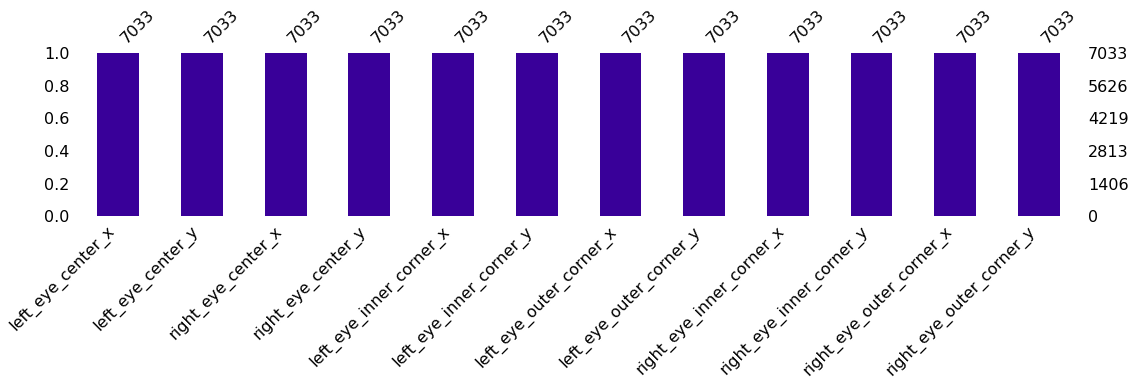

In [17]:
df_eyes = train_data.iloc[:, 0:12]

# Visualize missing data 
msno.bar(df_eyes,figsize=(18,3), color=COLORS[0])

## Eyebrows position

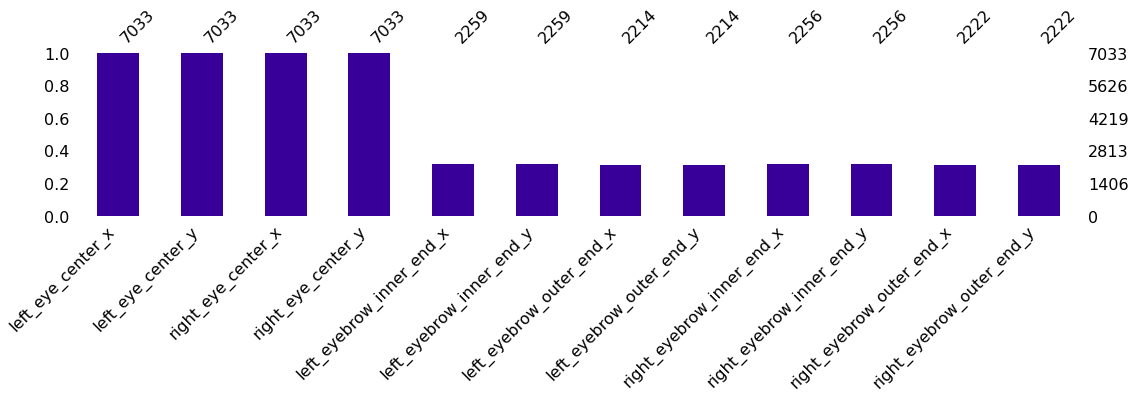

In [18]:
eyebrows_features = ['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x', 'right_eye_center_y', 'left_eyebrow_inner_end_x', 'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x', 'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x', 'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x', 'right_eyebrow_outer_end_y']
df_eyebrows = train_data.loc[:, eyebrows_features]

# Visualize missing data 
msno.bar(df_eyebrows,figsize=(18,3), color=COLORS[0])

df_eyebrows = df_eyebrows.dropna()

Let's use the dataset without missing values to find some correlations between features !

In [19]:
corr_matrix = df_eyebrows.corr()
fig = px.imshow(corr_matrix, text_auto=True, aspect="auto", color_continuous_scale=COLORS)
fig.show()

In [20]:
fig = px.scatter(df_eyebrows, x="left_eyebrow_outer_end_x", y="left_eye_center_x", trendline="ols", color_discrete_sequence=COLORS, trendline_color_override=COLORS[2], title='Left eye corner and center x correlation')
fig.show()

In [21]:
fig = px.scatter(df_eyebrows, x="left_eyebrow_inner_end_x", y="left_eye_center_x", trendline="ols", color_discrete_sequence=COLORS, trendline_color_override=COLORS[2], title='Left eye corner and center x correlation')
fig.show()

In [22]:
train_data = complete_linear_feature(train_data, 'left_eyebrow_outer_end_y', 'left_eye_center_y')
train_data = complete_linear_feature(train_data, 'left_eyebrow_inner_end_y', 'left_eye_center_y')
train_data = complete_linear_feature(train_data, 'left_eyebrow_outer_end_x', 'left_eye_center_x')
train_data = complete_linear_feature(train_data, 'left_eyebrow_inner_end_x', 'left_eye_center_x')
train_data = complete_linear_feature(train_data, 'right_eyebrow_outer_end_y', 'right_eye_center_y')
train_data = complete_linear_feature(train_data, 'right_eyebrow_inner_end_y', 'right_eye_center_y')
train_data = complete_linear_feature(train_data, 'right_eyebrow_outer_end_x', 'right_eye_center_x')
train_data = complete_linear_feature(train_data, 'right_eyebrow_inner_end_x', 'right_eye_center_x')

---------  left_eyebrow_outer_end_y ---------
Coefficient of determination:  0.5780721866919545 

left_eyebrow_outer_end_y  missing values before: 4819
left_eyebrow_outer_end_y  missing values after: 0 

---------  left_eyebrow_inner_end_y ---------
Coefficient of determination:  0.37160381550791033 

left_eyebrow_inner_end_y  missing values before: 4774
left_eyebrow_inner_end_y  missing values after: 0 

---------  left_eyebrow_outer_end_x ---------
Coefficient of determination:  0.6248778820230088 

left_eyebrow_outer_end_x  missing values before: 4819
left_eyebrow_outer_end_x  missing values after: 0 

---------  left_eyebrow_inner_end_x ---------
Coefficient of determination:  0.38394500619490424 

left_eyebrow_inner_end_x  missing values before: 4774
left_eyebrow_inner_end_x  missing values after: 0 

---------  right_eyebrow_outer_end_y ---------
Coefficient of determination:  0.5650203623793775 

right_eyebrow_outer_end_y  missing values before: 4811
right_eyebrow_outer_end_y  m

<AxesSubplot:>

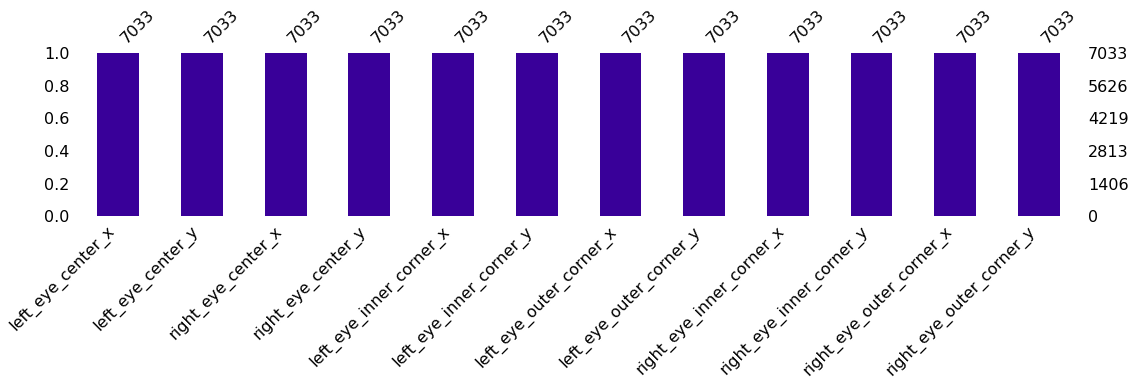

In [23]:
df_eyebrows = train_data.iloc[:, 0:12]

# Visualize missing data 
msno.bar(df_eyes,figsize=(18,3), color=COLORS[0])

## Mouth position

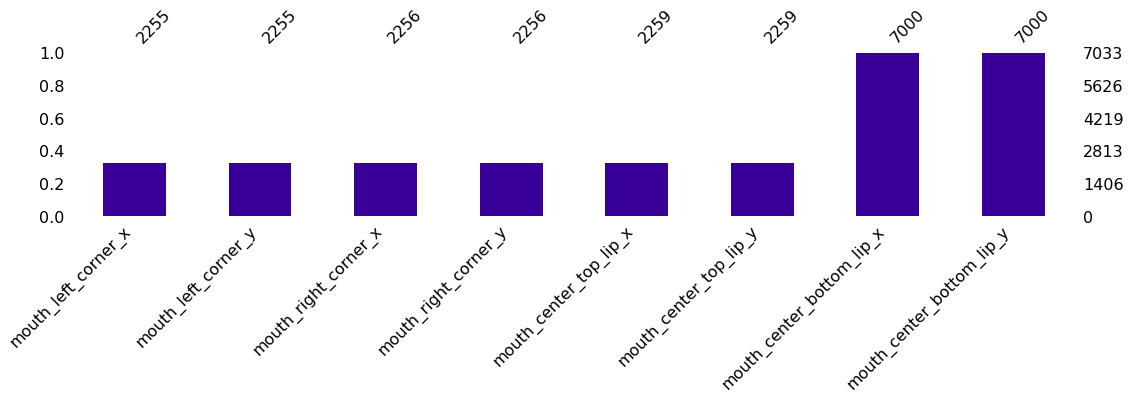

In [24]:
df_mouth = train_data.iloc[:, 22:30]

# Visualize missing data 
msno.bar(df_mouth,figsize=(18,3), color=COLORS[0])

df_mouth = df_mouth.dropna()

**Mouth center**

In [25]:
train_without_mouth_center = train_data.iloc[np.where(train_data['mouth_center_bottom_lip_x'].isna())[0]]
plot_images(train_without_mouth_center, 10, 0.4)

------------------
Number of rows: 2, number of cols: 5
Figure width: 192, height: 76
------------------


As eye center we decided to remove those pictures because they are too bad for our model.

In [26]:
train_data = remove_mv_from_a_column(train_data, "mouth_center_bottom_lip_x")

---------  mouth_center_bottom_lip_x  ---------
mouth_center_bottom_lip_x  missing values before: 33
mouth_center_bottom_lip_x  missing values after: 0


In [27]:
corr_matrix = df_mouth.corr()
fig = px.imshow(corr_matrix, text_auto=True, aspect="auto", color_continuous_scale=COLORS)
fig.show()

In [28]:
fig = px.scatter(df_mouth, x="mouth_left_corner_y", y="mouth_center_bottom_lip_y", trendline="ols", color_discrete_sequence=COLORS, trendline_color_override=COLORS[2], title='Left eye corner and center x correlation')
fig.show()

In [29]:
fig = px.scatter(df_mouth, x="mouth_right_corner_y", y="mouth_left_corner_y", trendline="ols", color_discrete_sequence=COLORS, trendline_color_override=COLORS[2], title='Left eye corner and center x correlation')
fig.show()

In [30]:
train_data = complete_linear_feature(train_data, 'mouth_left_corner_y', 'mouth_center_bottom_lip_y')
train_data = complete_linear_feature(train_data, 'mouth_right_corner_y', 'mouth_left_corner_y')
train_data = complete_linear_feature(train_data, 'mouth_center_top_lip_y', 'mouth_right_corner_y')
train_data = complete_linear_feature(train_data, 'mouth_left_corner_x', 'mouth_center_bottom_lip_x')
train_data = complete_linear_feature(train_data, 'mouth_right_corner_x', 'mouth_center_bottom_lip_x')
train_data = complete_linear_feature(train_data, 'mouth_center_top_lip_x', 'mouth_center_bottom_lip_x')

---------  mouth_left_corner_y ---------
Coefficient of determination:  0.5264524414544052 

mouth_left_corner_y  missing values before: 4762
mouth_left_corner_y  missing values after: 0 

---------  mouth_right_corner_y ---------
Coefficient of determination:  0.7108241926857561 

mouth_right_corner_y  missing values before: 4761
mouth_right_corner_y  missing values after: 0 

---------  mouth_center_top_lip_y ---------
Coefficient of determination:  0.5449934400365244 

mouth_center_top_lip_y  missing values before: 4755
mouth_center_top_lip_y  missing values after: 0 

---------  mouth_left_corner_x ---------
Coefficient of determination:  0.5428280981578952 

mouth_left_corner_x  missing values before: 4762
mouth_left_corner_x  missing values after: 0 

---------  mouth_right_corner_x ---------
Coefficient of determination:  0.5070332007379901 

mouth_right_corner_x  missing values before: 4761
mouth_right_corner_x  missing values after: 0 

---------  mouth_center_top_lip_x ------

<AxesSubplot:>

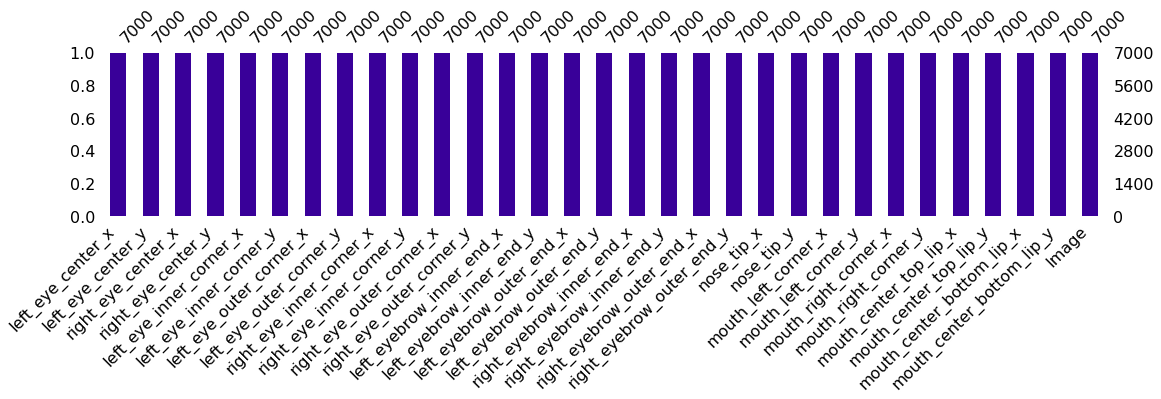

In [31]:
# Visualize missing data 
msno.bar(train_data,figsize=(18,3), color=COLORS[0])

Well done, we have no missing values left !


# Conclusion

You can have the same result by executing the following fonction on yout train dataset :

In [32]:
def remove_missing_values(df_train):
  # Eyes missing values
  df_train = remove_mv_from_a_column(df_train, "left_eye_center_x")
  df_train = remove_mv_from_a_column(df_train, "right_eye_center_x")
  df_train = complete_linear_feature(df_train, 'left_eye_outer_corner_y', 'left_eye_center_y')
  df_train = complete_linear_feature(df_train, 'left_eye_inner_corner_y', 'left_eye_center_y')
  df_train = complete_linear_feature(df_train, 'left_eye_outer_corner_x', 'left_eye_center_x')
  df_train = complete_linear_feature(df_train, 'left_eye_inner_corner_x', 'left_eye_center_x')
  df_train = complete_linear_feature(df_train, 'right_eye_outer_corner_y', 'right_eye_center_y')
  df_train = complete_linear_feature(df_train, 'right_eye_inner_corner_y', 'right_eye_center_y')
  df_train = complete_linear_feature(df_train, 'right_eye_outer_corner_x', 'right_eye_center_x')
  df_train = complete_linear_feature(df_train, 'right_eye_inner_corner_x', 'right_eye_center_x')

  # Eyebrows missing values
  df_train = complete_linear_feature(df_train, 'left_eyebrow_outer_end_y', 'left_eye_center_y')
  df_train = complete_linear_feature(df_train, 'left_eyebrow_inner_end_y', 'left_eye_center_y')
  df_train = complete_linear_feature(df_train, 'left_eyebrow_outer_end_x', 'left_eye_center_x')
  df_train = complete_linear_feature(df_train, 'left_eyebrow_inner_end_x', 'left_eye_center_x')
  df_train = complete_linear_feature(df_train, 'right_eyebrow_outer_end_y', 'right_eye_center_y')
  df_train = complete_linear_feature(df_train, 'right_eyebrow_inner_end_y', 'right_eye_center_y')
  df_train = complete_linear_feature(df_train, 'right_eyebrow_outer_end_x', 'right_eye_center_x')
  df_train = complete_linear_feature(df_train, 'right_eyebrow_inner_end_x', 'right_eye_center_x')

  # Mouth missing values
  df_train = remove_mv_from_a_column(df_train, "mouth_center_bottom_lip_x")
  df_train = complete_linear_feature(df_train, 'mouth_left_corner_y', 'mouth_center_bottom_lip_y')
  df_train = complete_linear_feature(df_train, 'mouth_right_corner_y', 'mouth_left_corner_y')
  df_train = complete_linear_feature(df_train, 'mouth_center_top_lip_y', 'mouth_right_corner_y')
  df_train = complete_linear_feature(df_train, 'mouth_left_corner_x', 'mouth_center_bottom_lip_x')
  df_train = complete_linear_feature(df_train, 'mouth_right_corner_x', 'mouth_center_bottom_lip_x')
  df_train = complete_linear_feature(df_train, 'mouth_center_top_lip_x', 'mouth_center_bottom_lip_x')

  return df_train

In [33]:
train_data, test_data, lookid_data = load_data()

(7049, 31) (1783, 2)


<AxesSubplot:>

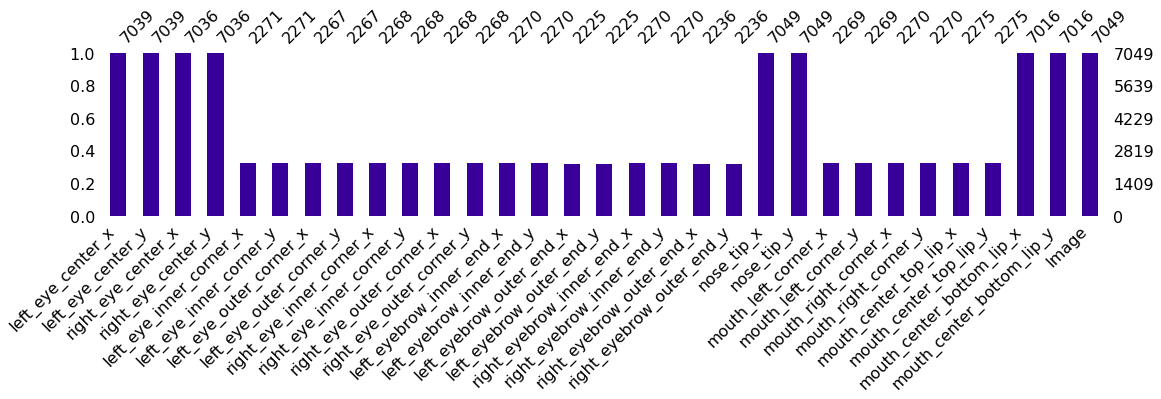

In [34]:
# Visualize missing data 
msno.bar(train_data,figsize=(18,3), color=COLORS[0])

In [35]:
train_data = remove_missing_values(train_data)

---------  left_eye_center_x  ---------
left_eye_center_x  missing values before: 10
left_eye_center_x  missing values after: 0
---------  right_eye_center_x  ---------
right_eye_center_x  missing values before: 6
right_eye_center_x  missing values after: 0
---------  left_eye_outer_corner_y ---------
Coefficient of determination:  0.9140833654802898 

left_eye_outer_corner_y  missing values before: 4776
left_eye_outer_corner_y  missing values after: 0 

---------  left_eye_inner_corner_y ---------
Coefficient of determination:  0.8590350955934366 

left_eye_inner_corner_y  missing values before: 4773
left_eye_inner_corner_y  missing values after: 0 

---------  left_eye_outer_corner_x ---------
Coefficient of determination:  0.7671919633235822 

left_eye_outer_corner_x  missing values before: 4776
left_eye_outer_corner_x  missing values after: 0 

---------  left_eye_inner_corner_x ---------
Coefficient of determination:  0.7243403537895403 

left_eye_inner_corner_x  missing values be

<AxesSubplot:>

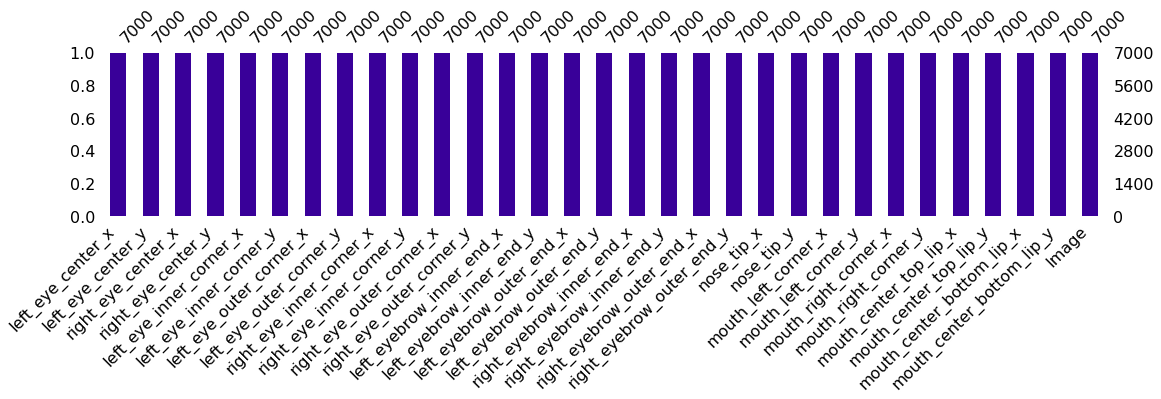

In [36]:
# Visualize missing data 
msno.bar(train_data,figsize=(18,3), color=COLORS[0])